# Exploring the Weather in Athens


The purpose of this assignment is to gain insight about the weather in Athens and the impact of climate change through the examination of data over a period of more than 50 years.

---
> Natalia Katsiapi, 810040 <br/>
> Department of Management Science and Technology <br/>
> Athens University of Economics and Business <br/>
> t8180040@aueb.gr

## Obtain the Data

The data for the Hellinikon weather station can be obtained from National Oceanic and Atmospheric Administration's National Centers for Environmental Information (https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:GR000016716/detail) in CSV format.

They are ready to be loaded with Pandas.

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

data = pd.read_csv("athens_data.csv", parse_dates=["DATE"])
data

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,GR000016716,1955-01-01,0.00,NaN,NaN,65.0,50.0
1,GR000016716,1955-01-02,0.08,NaN,NaN,58.0,45.0
2,GR000016716,1955-01-03,0.00,NaN,NaN,60.0,49.0
3,GR000016716,1955-01-04,0.00,NaN,NaN,66.0,45.0
4,GR000016716,1955-01-05,0.00,NaN,NaN,64.0,47.0
...,...,...,...,...,...,...,...
23246,GR000016716,2020-12-27,0.00,NaN,62.0,NaN,NaN
23247,GR000016716,2020-12-28,0.26,NaN,59.0,65.0,53.0
23248,GR000016716,2020-12-29,0.00,NaN,61.0,68.0,54.0
23249,GR000016716,2020-12-30,0.00,NaN,62.0,68.0,59.0


In [52]:
def fahrenheit_to_celsius(t):
    return 5/9 * (t - 32)

data[["TAVG", "TMAX", "TMIN"]] = data[["TAVG", "TMAX", "TMIN"]].apply(fahrenheit_to_celsius)
data

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,GR000016716,1955-01-01,0.00,NaN,NaN,18.333333,10.000000
1,GR000016716,1955-01-02,0.08,NaN,NaN,14.444444,7.222222
2,GR000016716,1955-01-03,0.00,NaN,NaN,15.555556,9.444444
3,GR000016716,1955-01-04,0.00,NaN,NaN,18.888889,7.222222
4,GR000016716,1955-01-05,0.00,NaN,NaN,17.777778,8.333333
...,...,...,...,...,...,...,...
23246,GR000016716,2020-12-27,0.00,NaN,16.666667,NaN,NaN
23247,GR000016716,2020-12-28,0.26,NaN,15.000000,18.333333,11.666667
23248,GR000016716,2020-12-29,0.00,NaN,16.111111,20.000000,12.222222
23249,GR000016716,2020-12-30,0.00,NaN,16.666667,20.000000,15.000000


As we notice, a significant number of average temperatures is missing till 1974.

In [53]:
data.DATE[data.TAVG.isna()]

0       1955-01-01
1       1955-01-02
2       1955-01-03
3       1955-01-04
4       1955-01-05
           ...    
7166    1974-08-15
7167    1974-08-16
7455    1975-05-31
7958    1976-10-15
16080   1999-01-10
Name: DATE, Length: 2311, dtype: datetime64[ns]

In [54]:
before_2010 = data.DATE.dt.year < 2010
# Cannot do inplace=True
data.loc[before_2010, 'TAVG'] = data.loc[before_2010, 'TAVG'].fillna(value=(data.TMAX + data.TMIN) / 2)

In [55]:
data[data.TAVG.isna()]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
798,GR000016716,1957-03-09,0.01,NaN,NaN,16.666667,NaN


We still have a date with null values, since TMIN is NaN. What we can do is use the average of the previous and the next year.

In [56]:
data.iloc[798] = (data.iloc[797].TAVG + data.iloc[799].TAVG) / 2
data.iloc[797:800]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
797,GR000016716,1957-03-08 00:00:00,0.020000,NaN,13.611111,17.222222,10.000000
798,11.805556,11.805556,11.805556,11.805556,11.805556,11.805556,11.805556
799,GR000016716,1957-03-10 00:00:00,0.000000,NaN,10.000000,12.222222,7.777778


Now we will examine TMAX and TMIN columns.

In [57]:
data[data.TMAX.isna() | data.TMIN.isna()]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
4119,GR000016716,1966-04-12 00:00:00,0.00,NaN,17.777778,22.222222,NaN
4335,GR000016716,1966-11-14 00:00:00,0.00,NaN,17.222222,19.444444,NaN
9102,GR000016716,1979-12-03 00:00:00,0.04,NaN,15.000000,NaN,NaN
18266,GR000016716,2005-01-04 00:00:00,0.00,NaN,8.333333,NaN,NaN
18270,GR000016716,2005-01-08 00:00:00,0.00,NaN,10.000000,12.777778,NaN
...,...,...,...,...,...,...,...
23229,GR000016716,2020-12-10 00:00:00,NaN,NaN,14.444444,NaN,NaN
23232,GR000016716,2020-12-13 00:00:00,0.35,NaN,14.444444,NaN,12.222222
23233,GR000016716,2020-12-14 00:00:00,0.00,NaN,12.222222,NaN,11.111111
23246,GR000016716,2020-12-27 00:00:00,0.00,NaN,16.666667,NaN,NaN


We will calculate them, based on the previous logic, using TAVG.

In [60]:
data.loc[before_2010, 'TMAX'] = data.loc[before_2010, 'TMAX'].fillna(value=2 * data.TAVG - data.TMIN)
data.loc[before_2010, 'TMIN'] = data.loc[before_2010, 'TMIN'].fillna(value=2 * data.TAVG - data.TMAX)
data[data.TMAX.isna() | data.TMIN.isna()]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
9102,GR000016716,1979-12-03 00:00:00,0.04,NaN,15.000000,NaN,NaN
18266,GR000016716,2005-01-04 00:00:00,0.00,NaN,8.333333,NaN,NaN
18289,GR000016716,2005-01-27 00:00:00,NaN,NaN,12.777778,NaN,NaN
18293,GR000016716,2005-01-31 00:00:00,0.44,NaN,5.555556,NaN,NaN
18296,GR000016716,2005-02-03 00:00:00,NaN,NaN,3.888889,NaN,NaN
...,...,...,...,...,...,...,...
23229,GR000016716,2020-12-10 00:00:00,NaN,NaN,14.444444,NaN,NaN
23232,GR000016716,2020-12-13 00:00:00,0.35,NaN,14.444444,NaN,12.222222
23233,GR000016716,2020-12-14 00:00:00,0.00,NaN,12.222222,NaN,11.111111
23246,GR000016716,2020-12-27 00:00:00,0.00,NaN,16.666667,NaN,NaN


There are still missing values, however for the time being they do not have an impact on our analysis. The same goes for percipitation. For the sake of completeness we will fill them with an average of values before 2010.

In [67]:
data.loc[before_2010, 'TMIN'] = data.loc[before_2010, 'TMIN'].fillna(value=data.loc[before_2010, 'TMIN'].mean())
data.loc[before_2010, 'TMAX'] = data.loc[before_2010, 'TMAX'].fillna(value=data.loc[before_2010, 'TMAX'].mean())
data.loc[before_2010, 'PRCP'] = data.loc[before_2010, 'PRCP'].fillna(value=data.loc[before_2010, 'PRCP'].mean())
data[data.TMAX.isna() | data.TMIN.isna() | data.PRCP.isna()]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
20086,GR000016716,2010-01-01 00:00:00,NaN,NaN,17.777778,21.666667,NaN
20095,GR000016716,2010-01-10 00:00:00,0.00,NaN,13.888889,16.666667,NaN
20101,GR000016716,2010-01-16 00:00:00,0.00,NaN,10.555556,NaN,NaN
20104,GR000016716,2010-01-19 00:00:00,NaN,NaN,8.888889,11.666667,NaN
20107,GR000016716,2010-01-22 00:00:00,0.00,NaN,7.777778,10.000000,NaN
...,...,...,...,...,...,...,...
23232,GR000016716,2020-12-13 00:00:00,0.35,NaN,14.444444,NaN,12.222222
23233,GR000016716,2020-12-14 00:00:00,0.00,NaN,12.222222,NaN,11.111111
23244,GR000016716,2020-12-25 00:00:00,NaN,NaN,15.000000,19.444444,12.777778
23246,GR000016716,2020-12-27 00:00:00,0.00,NaN,16.666667,NaN,NaN


In [328]:
recent_data_headers = ["date", "avgTemp", "maxTemp", "minTemp"]

recent_data = pd.read_csv("athens.csv")
recent_data.columns = range(14)
recent_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
1,2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
2,2010-01-04,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
3,2010-01-05,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8
4,2010-01-06,16.8,16.9,16.8,79.3,83,72,1012.9,1015.6,1011.1,0.0,15.2,S,34.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646,2019-12-27,10.1,10.2,10.0,60.3,79,44,1018.4,1019.9,1016.8,0.0,2.9,NE,8.0
3647,2019-12-28,8.3,8.4,8.2,60.9,82,46,1016.0,1017.2,1014.2,7.2,4.3,NE,12.8
3648,2019-12-29,6.4,6.5,6.4,73.4,82,66,1017.6,1018.9,1016.5,3.4,10.6,NNE,24.5
3649,2019-12-30,4.0,4.0,3.9,83.9,90,65,1020.0,1024.2,1016.6,12.4,5.1,NE,15.0


It would be easy to replace the part which is greater than 2010-01-02 with the recent dataset. However, as we see, they are not of the same shape.

In [329]:
data.DATE.loc[22884] - data.DATE.loc[20087]

Timedelta('3650 days 00:00:00')

In [330]:
data.loc[(data.DATE >= "2010-01-02") & (data.DATE <= "2019-12-31"), "DATE"]

20087   2010-01-02
20088   2010-01-03
20089   2010-01-04
20090   2010-01-05
20091   2010-01-06
           ...    
22880   2019-12-27
22881   2019-12-28
22882   2019-12-29
22883   2019-12-30
22884   2019-12-31
Name: DATE, Length: 2798, dtype: datetime64[ns]

In [331]:
recent_data.loc[recent_data[0] >= "2010-01-02", 0]

0       2010-01-02
1       2010-01-03
2       2010-01-04
3       2010-01-05
4       2010-01-06
           ...    
3646    2019-12-27
3647    2019-12-28
3648    2019-12-29
3649    2019-12-30
3650    2019-12-31
Name: 0, Length: 3651, dtype: object

In [332]:
data.set_index("DATE")


,STATION,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,
1955-01-01,GR000016716,0.00,NaN,14.166667,18.333333,10.000000
1955-01-02,GR000016716,0.08,NaN,10.833333,14.444444,7.222222
1955-01-03,GR000016716,0.00,NaN,12.500000,15.555556,9.444444
1955-01-04,GR000016716,0.00,NaN,13.055556,18.888889,7.222222
1955-01-05,GR000016716,0.00,NaN,13.055556,17.777778,8.333333
...,...,...,...,...,...,...
2020-12-27,GR000016716,0.00,NaN,16.666667,NaN,NaN
2020-12-28,GR000016716,0.26,NaN,15.000000,18.333333,11.666667
2020-12-29,GR000016716,0.00,NaN,16.111111,20.000000,12.222222


In [333]:
# https://www.skytowner.com/explore/adding_missing_dates_in_datetime_index_in_pandas_dataframe
new_date_range = pd.date_range(start="2010-01-02", end="2019-12-31", freq="D")
data.reindex(new_date_range, fill_value=0)

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
2010-01-02,0,0,0.0,0.0,0.0,0.0,0.0
2010-01-03,0,0,0.0,0.0,0.0,0.0,0.0
2010-01-04,0,0,0.0,0.0,0.0,0.0,0.0
2010-01-05,0,0,0.0,0.0,0.0,0.0,0.0
2010-01-06,0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2019-12-27,0,0,0.0,0.0,0.0,0.0,0.0
2019-12-28,0,0,0.0,0.0,0.0,0.0,0.0
2019-12-29,0,0,0.0,0.0,0.0,0.0,0.0
2019-12-30,0,0,0.0,0.0,0.0,0.0,0.0


In [334]:
data.DATE[data.TAVG.isna()]

798   1957-03-09
Name: DATE, dtype: datetime64[ns]

In [335]:
data.fillna(recent_data)

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,GR000016716,1955-01-01,0.00,NaN,14.166667,18.333333,10.000000
1,GR000016716,1955-01-02,0.08,NaN,10.833333,14.444444,7.222222
2,GR000016716,1955-01-03,0.00,NaN,12.500000,15.555556,9.444444
3,GR000016716,1955-01-04,0.00,NaN,13.055556,18.888889,7.222222
4,GR000016716,1955-01-05,0.00,NaN,13.055556,17.777778,8.333333
...,...,...,...,...,...,...,...
23246,GR000016716,2020-12-27,0.00,NaN,16.666667,NaN,NaN
23247,GR000016716,2020-12-28,0.26,NaN,15.000000,18.333333,11.666667
23248,GR000016716,2020-12-29,0.00,NaN,16.111111,20.000000,12.222222
23249,GR000016716,2020-12-30,0.00,NaN,16.666667,20.000000,15.000000


In [336]:
# data.loc[(data['DATE'] == recent_data[0]) & data['TMAX'].isna(), 'TMAX'] = 1
new = data.loc[data.DATE.dt.year >= 2010]
new

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
20086,GR000016716,2010-01-01,NaN,NaN,17.777778,21.666667,NaN
20087,GR000016716,2010-01-02,0.00,NaN,16.111111,17.777778,13.888889
20088,GR000016716,2010-01-03,0.00,NaN,13.333333,15.555556,10.555556
20089,GR000016716,2010-01-04,0.00,NaN,8.888889,11.111111,5.555556
20090,GR000016716,2010-01-05,0.00,NaN,13.333333,16.111111,8.333333
...,...,...,...,...,...,...,...
23246,GR000016716,2020-12-27,0.00,NaN,16.666667,NaN,NaN
23247,GR000016716,2020-12-28,0.26,NaN,15.000000,18.333333,11.666667
23248,GR000016716,2020-12-29,0.00,NaN,16.111111,20.000000,12.222222
23249,GR000016716,2020-12-30,0.00,NaN,16.666667,20.000000,15.000000


In [337]:
new.drop(20086, axis=0)

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
20087,GR000016716,2010-01-02,0.00,NaN,16.111111,17.777778,13.888889
20088,GR000016716,2010-01-03,0.00,NaN,13.333333,15.555556,10.555556
20089,GR000016716,2010-01-04,0.00,NaN,8.888889,11.111111,5.555556
20090,GR000016716,2010-01-05,0.00,NaN,13.333333,16.111111,8.333333
20091,GR000016716,2010-01-06,0.01,NaN,16.666667,18.333333,15.555556
...,...,...,...,...,...,...,...
23246,GR000016716,2020-12-27,0.00,NaN,16.666667,NaN,NaN
23247,GR000016716,2020-12-28,0.26,NaN,15.000000,18.333333,11.666667
23248,GR000016716,2020-12-29,0.00,NaN,16.111111,20.000000,12.222222
23249,GR000016716,2020-12-30,0.00,NaN,16.666667,20.000000,15.000000


In [338]:
new.set_index('DATE')
recent_data.set_index(0)

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,,,,,,,,,,,,,
2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
2010-01-04,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
2010-01-05,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8
2010-01-06,16.8,16.9,16.8,79.3,83,72,1012.9,1015.6,1011.1,0.0,15.2,S,34.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,10.1,10.2,10.0,60.3,79,44,1018.4,1019.9,1016.8,0.0,2.9,NE,8.0
2019-12-28,8.3,8.4,8.2,60.9,82,46,1016.0,1017.2,1014.2,7.2,4.3,NE,12.8
2019-12-29,6.4,6.5,6.4,73.4,82,66,1017.6,1018.9,1016.5,3.4,10.6,NNE,24.5


In [339]:
data.describe()

,PRCP,SNWD,TAVG,TMAX,TMIN
count,22773.000000,30.000000,23250.000000,22307.000000,22418.000000
mean,0.039799,6.006667,18.270346,22.347594,14.470886
std,0.182426,13.950922,6.889410,7.394020,6.461972
min,0.000000,0.400000,-2.222222,1.111111,-4.444444
25%,0.000000,0.400000,12.777778,16.666667,9.444444
50%,0.000000,0.800000,17.777778,21.666667,14.444444
75%,0.000000,1.600000,24.444444,28.888889,20.000000
max,5.590000,48.800000,35.000000,42.222222,30.555556


## Q2: Deviation of Summer Temperatures


We will start by obtaining the data from 1974 and afterwards.

In [340]:
recent_df = data.loc[data.DATE.dt.year >= 1974]
recent_df

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
6940,GR000016716,1974-01-01,0.00,NaN,11.666667,12.777778,10.000000
6941,GR000016716,1974-01-02,0.00,NaN,13.888889,15.555556,11.111111
6942,GR000016716,1974-01-03,0.39,NaN,12.222222,16.111111,10.555556
6943,GR000016716,1974-01-04,0.00,NaN,10.555556,12.777778,8.333333
6944,GR000016716,1974-01-05,0.00,NaN,9.444444,11.111111,8.333333
...,...,...,...,...,...,...,...
23246,GR000016716,2020-12-27,0.00,NaN,16.666667,NaN,NaN
23247,GR000016716,2020-12-28,0.26,NaN,15.000000,18.333333,11.666667
23248,GR000016716,2020-12-29,0.00,NaN,16.111111,20.000000,12.222222
23249,GR000016716,2020-12-30,0.00,NaN,16.666667,20.000000,15.000000


Then, we will need to group by year to calculate the average yearly temperature.

In [341]:
summer = recent_df[recent_df.DATE.dt.month.between(6,8)]
summer_grouped = summer.groupby(data.DATE.dt.year)
# summer_means.mad().TAVG
# summer_means.TAVG.mean()
summer_grouped

In [342]:
summer_mean = summer.TAVG.mean()
deviations = []
for n, s in summer_grouped:
    deviation = s.TAVG.mean() - summer_mean
    deviations.append(deviation)
summer_devs = pd.DataFrame({
    "year": summer_grouped.groups.keys(),
    "dev": deviations
})
summer_devs.head(3)

,year,dev
0,1974,-0.394996
1,1975,-0.911301
2,1976,-2.004296


In [343]:
years = recent_df.groupby(data.DATE.dt.year)
years.mean().head(3)

,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,
1974,0.036137,NaN,18.089041,21.789954,14.517504
1975,0.041260,NaN,18.162861,21.814307,14.491629
1976,0.053525,NaN,17.440043,20.986642,13.778081


In [344]:
# sns.lineplot(x='size',y='total_bill', data=summer_devs)


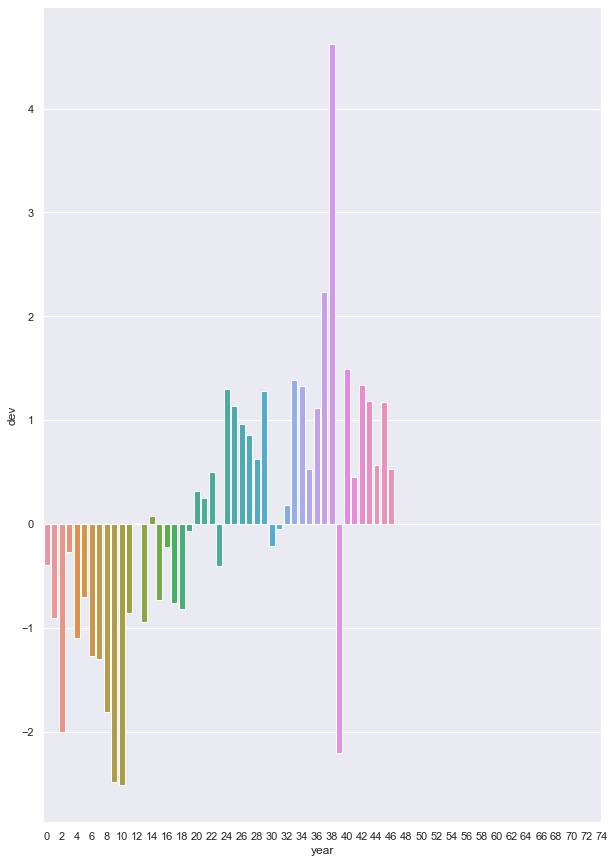

In [345]:
sns.set_theme()
plt.figure(figsize=(10,15))
ax = sns.barplot(x="year", y="dev", data=summer_devs)
ax.set_xticks(range(0, 75, 2))
_ = ax.set_xticklabels(range(0, 75, 2))# plt.bar(x="year", width=0.05, height=0.04, data=summer_devs)

In [346]:
data['YEAR'] = data.DATE.dt.year
data['DAY'] = data.DATE.dt.dayofyear
recent_df['DAY'] = recent_df.DATE.dt.dayofyear
data['MONTH'] = None

D:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [347]:
# average_per_year = []
# for n, v in years:
#     month_grouping = v.groupby(v.DATE.dt.month)
#     average_per_year.append(month_grouping.TAVG.mean())
# new_with_months = pd.concat(average_per_year)
# new_with_months

mean_per_month_year = data.groupby("YEAR").mean()
mean_per_month_year

,PRCP,SNWD,TAVG,TMAX,TMIN,DAY
YEAR,,,,,,
1955,0.059041,NaN,18.779300,23.164384,14.394216,183.000000
1956,0.030273,NaN,18.153461,22.577413,13.729508,183.500000
1957,0.032630,NaN,18.408883,22.622527,14.246032,183.000000
1958,0.037781,NaN,18.694064,22.916286,14.800609,183.000000
1959,0.023068,NaN,17.919330,22.057839,13.780822,183.000000
...,...,...,...,...,...,...
2016,0.028597,0.600000,19.386606,19.985380,15.480984,183.841096
2017,0.036012,0.400000,18.905133,24.862385,15.249710,180.654971
2018,0.041588,0.400000,19.485653,23.757950,15.967278,182.788462


<AxesSubplot:xlabel='DAY', ylabel='TAVG'>

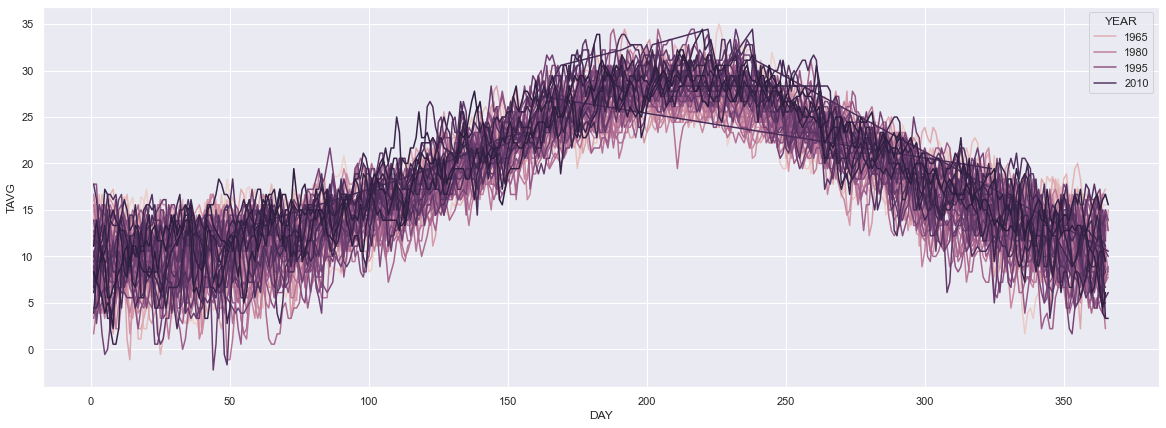

In [348]:
fig, axes = plt.subplots(figsize=(20,7))
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months = mdates.MonthLocator()  # every month
sns.lineplot(x="DAY", y="TAVG", data=data, hue="YEAR")


In [349]:
data['30day_rolling_avg'] = data.TAVG.rolling(30).mean()
data.tail(60)

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,YEAR,DAY,MONTH,30day_rolling_avg
23191,GR000016716,2020-11-02,0.00,NaN,16.666667,22.777778,12.777778,2020,307,None,20.759259
23192,GR000016716,2020-11-03,0.00,NaN,17.777778,NaN,15.000000,2020,308,None,20.537037
23193,GR000016716,2020-11-04,0.00,NaN,18.333333,23.333333,15.000000,2020,309,None,20.333333
23194,GR000016716,2020-11-05,0.00,NaN,17.777778,NaN,16.111111,2020,310,None,20.092593
23195,GR000016716,2020-11-06,0.00,NaN,16.666667,17.777778,16.111111,2020,311,None,19.796296
23196,GR000016716,2020-11-07,NaN,NaN,16.666667,20.000000,15.000000,2020,312,None,19.574074
23197,GR000016716,2020-11-08,0.00,NaN,16.666667,20.000000,15.000000,2020,313,None,19.425926
23198,GR000016716,2020-11-09,0.00,NaN,16.666667,21.111111,13.333333,2020,314,None,19.259259
23199,GR000016716,2020-11-10,0.00,NaN,17.777778,NaN,15.555556,2020,315,None,19.111111
23200,GR000016716,2020-11-11,0.00,NaN,17.222222,20.000000,NaN,2020,316,None,18.925926


In [355]:
recent_df['30day_rolling_avg'] = data.TAVG.rolling(30).mean()
data['recent_30day_rolling_avg'] = recent_df['30day_rolling_avg']
data

D:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,YEAR,DAY,MONTH,30day_rolling_avg,recent_30day_rolling_avg
1000,GR000016716,1957-09-27,0.00,NaN,24.444444,28.888889,20.000000,1957,270,None,24.833333,NaN
1001,GR000016716,1957-09-28,0.02,NaN,23.333333,25.555556,20.000000,1957,271,None,24.703704,NaN
1002,GR000016716,1957-09-29,0.00,NaN,22.222222,27.777778,19.444444,1957,272,None,24.518519,NaN
1003,GR000016716,1957-09-30,0.00,NaN,22.777778,26.666667,17.777778,1957,273,None,24.388889,NaN
1004,GR000016716,1957-10-01,0.00,NaN,23.333333,27.777778,18.333333,1957,274,None,24.277778,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2496,GR000016716,1961-11-01,0.00,NaN,20.000000,24.444444,14.444444,1961,305,None,18.777778,NaN
2497,GR000016716,1961-11-02,0.00,NaN,18.888889,22.777778,17.222222,1961,306,None,18.648148,NaN
2498,GR000016716,1961-11-03,0.00,NaN,17.777778,22.222222,13.333333,1961,307,None,18.518519,NaN
2499,GR000016716,1961-11-04,0.00,NaN,18.333333,21.666667,13.333333,1961,308,None,18.444444,NaN


AttributeError: 'Line2D' object has no property 'ax'

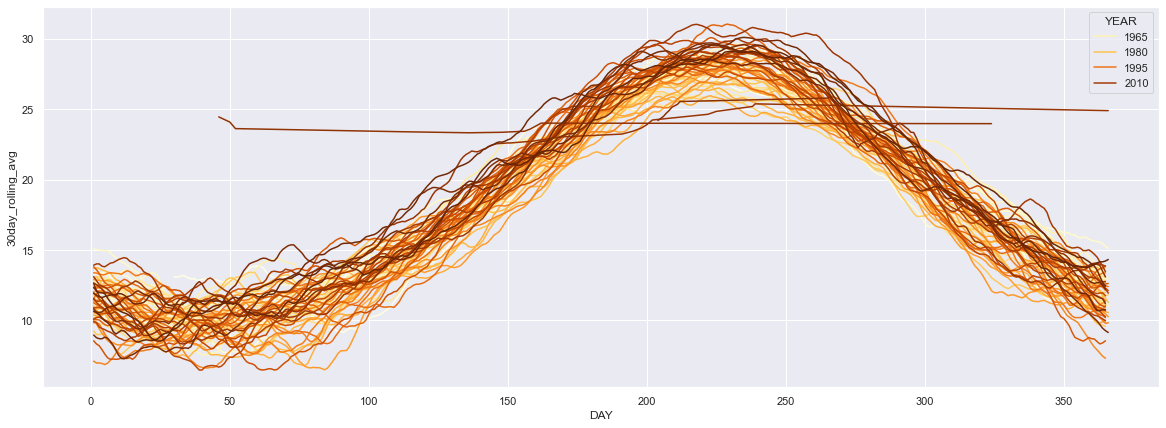

In [362]:
fig, axes = plt.subplots(figsize=(20,7))
ax = sns.lineplot(x="DAY", y="30day_rolling_avg", data=data, hue="YEAR", palette="YlOrBr")
plt.plot(data["recent_30day_rolling_avg"], ax=ax)

<AxesSubplot:xlabel='DAY', ylabel='30day_rolling_avg'>

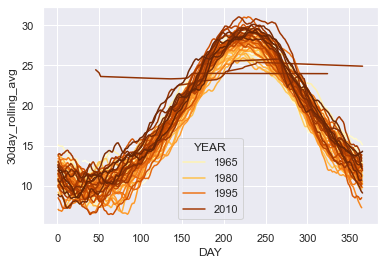

In [352]:
sns.lineplot(x="DAY", y="30day_rolling_avg", data=data, hue="YEAR", palette="YlOrBr")